In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath(".."))
from assets.modules.materials import *
from assets.modules.shapes import *

In [2]:
def plot_stress_strain_curves(materials:list[Material], figsize:tuple=(6, 4)):
    plt.figure(figsize=figsize)
    
    for material in materials:
        eps_u = material.eps_u
        strain = np.linspace(0, 0.999*eps_u, 1000) 
        stress = material.stress(strain)
        plt.plot(strain, stress, label=material.name)
        
    plt.xlabel("Strain (ε)")
    plt.ylabel("Stress (σ)")
    plt.legend()  
    plt.grid(True)
    plt.title("Stress-Strain Curve")
    plt.tight_layout()
    plt.show()

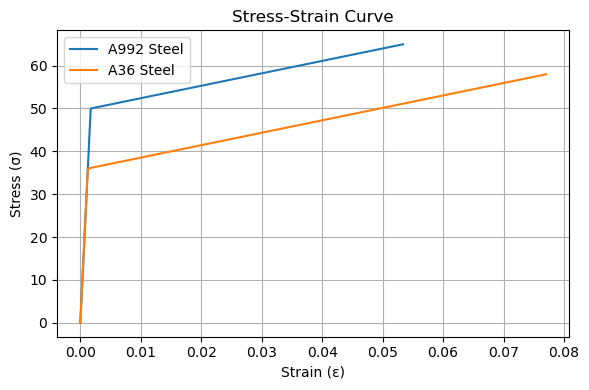

In [3]:

a992 = BilinearA992Steel()
a36 = BilinearA36Steel()

plot_stress_strain_curves([a992, a36])


Center: Point(x=0, y=0)
Area: 10
Moment of intertia (angle=0, pivot=None): (0.8333333333333286, 83.33333333333333, 0.0)
Moment of intertia (angle=45, pivot=None): (42.08333333333333, 42.08333333333333, -41.25)
Moment of intertia (pivot=(10, -5)): (250.83333333333331, 1083.3333333333333, -500.0)
Moment of intertia (angle=45, pivot=(10, -5)): (292.0833333333333, 1042.0833333333333, -541.25)


<Axes: >

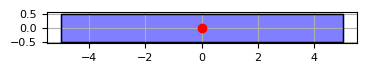

In [4]:
c1 = Point(0,0)

r1 = Rectangle(10, 1, c1)
print(f"Center: {r1.center}")
print(f"Area: {r1.area}")
print(f"Moment of intertia (angle=0, pivot=None): {r1.moment_inertia()}")
print(f"Moment of intertia (angle=45, pivot=None): {r1.moment_inertia(angle_deg=45)}")
print(f"Moment of intertia (pivot=(10, -5)): {r1.moment_inertia(pivot=(10, -5))}")
print(f"Moment of intertia (angle=45, pivot=(10, -5)): {r1.moment_inertia(angle_deg=45, pivot=(10, -5))}")
r1.plot()

<Axes: >

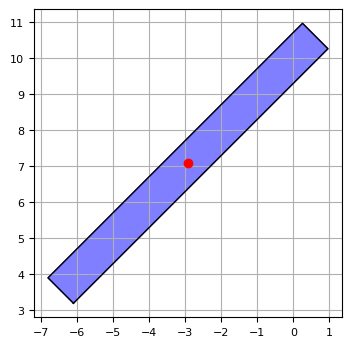

In [5]:
r1.rotate(45, pivot=(-10,0))
r1.plot()

In [6]:
top_flange = Rectangle(10, 0.75) # bottom flange is the same
web = Rectangle(0.25, 20)
params = ISectionParams(top_flange, web)
sec1 = ISection(params)
sec1.components

{'top_flange': Rectangle(width=10, height=0.75, center=Point(x=0.0, y=10.375), rotation=0),
 'bottom_flange': Rectangle(width=10, height=0.75, center=Point(x=0.0, y=-10.375), rotation=0),
 'web': Rectangle(width=0.25, height=20, center=Point(x=0.0, y=0.0), rotation=0)}

In [7]:
print(f"top flange area: {top_flange.area}")
print(f"top flange moment of inertia: {top_flange.moment_inertia()}")

print(f"web area: {web.area}")
print(f"web moment of inertia: {web.moment_inertia()}")


top flange area: 7.5
top flange moment of inertia: (0.3515625, 62.5, 0.0)
web area: 5.0
web moment of inertia: (166.66666666666666, 0.026041666666657193, 0.0)


top flange coordinates: Point(x=-5.187499999999999, y=8.985013564263552)
web coordinates: Point(x=0.0, y=0.0)
bottom flange coordinates: Point(x=5.187499999999999, y=-8.985013564263552)

Center: Point(x=0.0, y=0.0)
Area: 20.0
top_flange: ix: 636.904, iy: 233.252, ixy: -380.647
bottom_flange: ix: 636.904, iy: 233.252, ixy: -380.647
web: ix: 83.346, iy: 83.346, ixy: 83.320
Moment of intertia (angle=45, pivot=None): (1357.154947916667, 549.8502604166665, -677.9744929692575)


<Axes: >

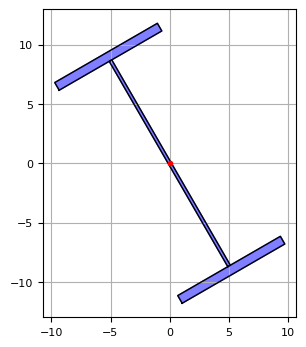

In [16]:
print(f"top flange coordinates: {sec1._top_flange.center}")
print(f"web coordinates: {sec1._web.center}")
print(f"bottom flange coordinates: {sec1._bottom_flange.center}")
print()
print(f"Center: {sec1.center}")
print(f"Area: {sec1.area}")
# print(f"Moment of intertia (angle=0, pivot=None): {sec1.moment_inertia()}")
print(f"Moment of intertia (angle=45, pivot=None): {sec1.moment_inertia(angle_deg=45)}")
# print(f"Moment of intertia (pivot=(10, -5)): {sec1.moment_inertia(pivot=(10, -5))}")
# print(f"Moment of intertia (angle=45, pivot=(10, -5)): {sec1.moment_inertia(angle_deg=45, pivot=(10, -5))}")
sec1.plot(linewidth=1, markersize=3)

{'top_flange': Rectangle(width=10, height=0.75, center=Point(x=-5.187499999999999, y=8.985013564263552), rotation=30), 'bottom_flange': Rectangle(width=10, height=0.75, center=Point(x=5.187499999999999, y=-8.985013564263552), rotation=30), 'web': Rectangle(width=0.25, height=20, center=Point(x=0.0, y=0.0), rotation=30)}


<Axes: >

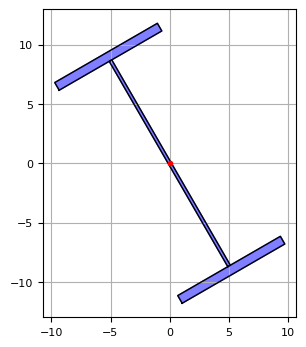

In [9]:
sec1.rotate(30, (0,0))
print(sec1.components)
sec1.plot(linewidth=1, markersize=3)

Point(x=0.0, y=0.0)
Point(x=5.0, y=5.0)
(-5.0, 14.696428571428571)
Point(x=8.927478208013607, y=14.911085987145917)


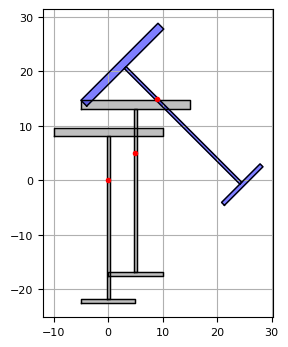

In [10]:
top_flange = Rectangle(20, 1.5)
web = Rectangle(0.5, 30)
bottom_flange = Rectangle(10, 0.75)
params = ISectionParams(top_flange, web, bottom_flange)
sec2 = ISection(params)

print(sec2.center)
ax = sec2.plot(linewidth=0.5, markersize=3, fill_color="grey")

sec2.translate(dx=5, dy=5)
print(sec2.center)
ax = sec2.plot(ax=ax, linewidth=0.5, markersize=3, fill_color="grey")

top_left_corner_x = sec2._top_flange.corners[-1].x
top_left_corner_y = sec2._top_flange.corners[-1].y
top_left_corner = (top_left_corner_x, top_left_corner_y)
print(top_left_corner)

sec2.rotate(45, top_left_corner)
print(sec2.center)
ax = sec2.plot(ax=ax, linewidth=1, markersize=3)
plt.show()